In [1]:
import pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

In [2]:
import sys
import os
sys.path.insert(0, './../scripts')

In [4]:
from importlib import reload

import functions as fun

import ricciardi_class as ric
import network as network

output_dir='./../Paper_Figures'

In [19]:
reload(ric)

ri = ric.Ricciardi()
ri.set_up_nonlinearity('phi_int')

ri_nosat = ric.Ricciardi()
ri_nosat.tau_rp = 0
ri_nosat.set_up_nonlinearity('phi_int_nosat')

Loading previously saved nonlinearity
Calculating nonlinearity


In [71]:
def phi_relu(mu,a):
    return a*np.fmax(mu*1e3,0)

def phi_ssn(mu,a):
    return a*np.fmax(mu*1e3,0)**2

a_relu = 1.5
a_ssn = 0.05

# Plot Ricciardi Activation Functions

Text(0, 0.5, '$\\phi(\\mu)$')

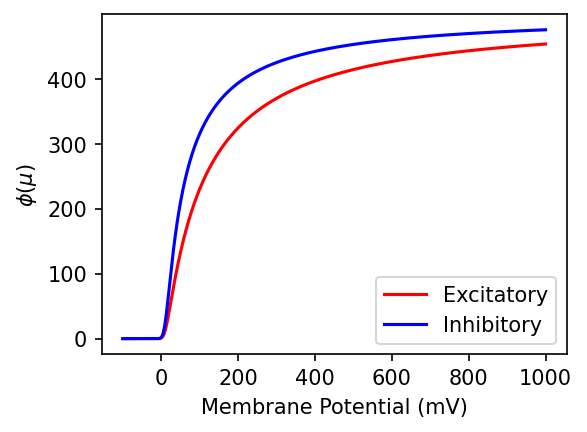

In [105]:
fig,axs = plt.subplots(1,1,figsize=(4,3),dpi=150,sharex=True,sharey=True)

mus = np.linspace(-0.1,1.0,1100+1)

axs.plot(1e3*mus,ri.phi_int_E(mus),'r',label='Excitatory')
axs.plot(1e3*mus,ri.phi_int_I(mus),'b',label='Inhibitory')

axs.legend()

axs.set_xlabel('Membrane Potential (mV)')

axs.set_ylabel(r'$\phi(\mu)$')

Text(0, 0.5, '$\\phi_E(\\mu)\\ /\\ \\phi_I(\\mu)$')

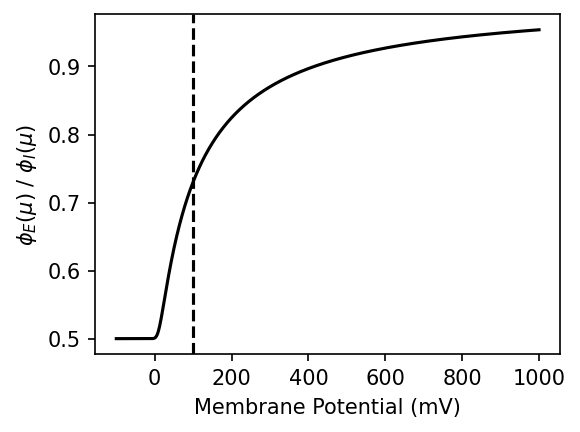

In [94]:
fig,axs = plt.subplots(1,1,figsize=(4,3),dpi=150,sharex=True,sharey=True)

mus = np.linspace(-0.1,1.0,1100+1)

axs.plot(1e3*mus,ri.phi_int_E(mus)/ri.phi_int_I(mus),'k')
axs.axvline(100,c='k',ls='--')

axs.set_xlabel('Membrane Potential (mV)')

axs.set_ylabel(r'$\phi_E(\mu)\ /\ \phi_I(\mu)$')

# Plot I Network Activation Functions

Text(0, 0.5, '$\\phi_I(\\mu)\\ /\\ \\phi_I($100 mV)')

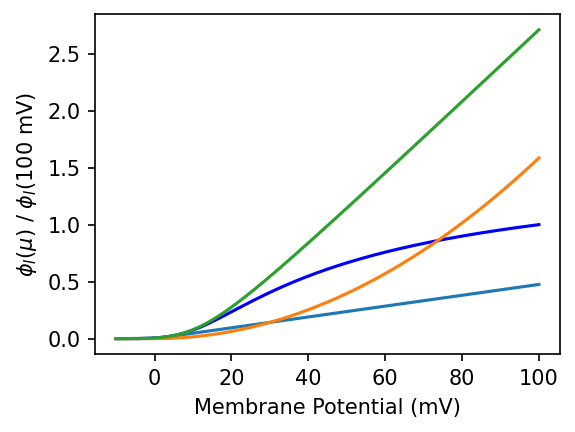

In [104]:
fig,axs = plt.subplots(1,1,figsize=(4,3),dpi=150,sharex=True,sharey=True)

mus = np.linspace(-0.01,0.1,1100+1)

axs.plot(1e3*mus,ri.phi_int_I(mus)/ri.phi_int_I(mus[-1]),'b')
axs.plot(1e3*mus,phi_relu(mus,a_relu)/ri.phi_int_I(mus[-1]))
axs.plot(1e3*mus,phi_ssn(mus,a_ssn)/ri.phi_int_I(mus[-1]))
axs.plot(1e3*mus,ri_nosat.phi_int_I(mus)/ri.phi_int_I(mus[-1]))

axs.set_xlabel('Membrane Potential (mV)')

axs.set_ylabel(r'$\phi_I(\mu)\ /\ \phi_I($100 mV)')

# Plot E Network Activation Functions

In [80]:
E_scale = 0.7

Text(0, 0.5, '$\\phi_E(\\mu)\\ /\\ \\phi_E($100 mV)')

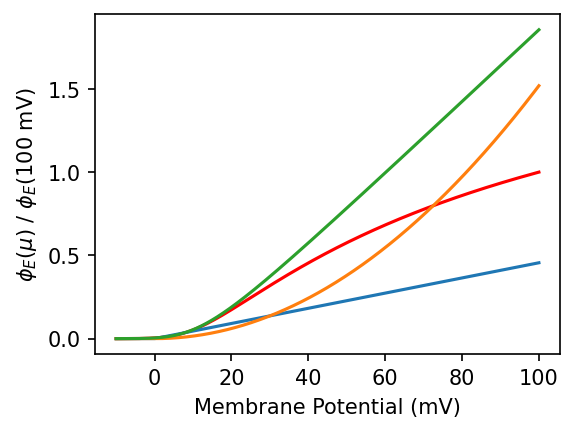

In [103]:
fig,axs = plt.subplots(1,1,figsize=(4,3),dpi=150,sharex=True,sharey=True)

mus = np.linspace(-0.01,0.1,1100+1)

axs.plot(1e3*mus,ri.phi_int_E(mus)/ri.phi_int_E(mus[-1]),'r')
axs.plot(1e3*mus,E_scale*phi_relu(mus,a_relu)/ri.phi_int_E(mus[-1]))
axs.plot(1e3*mus,E_scale*phi_ssn(mus,a_ssn)/ri.phi_int_E(mus[-1]))
axs.plot(1e3*mus,ri_nosat.phi_int_E(mus)/ri.phi_int_E(mus[-1]))

axs.set_xlabel('Membrane Potential (mV)')

axs.set_ylabel(r'$\phi_E(\mu)\ /\ \phi_E($100 mV)')

# Plot Everything Together

Text(0.5, 1.0, 'Inhibitory')

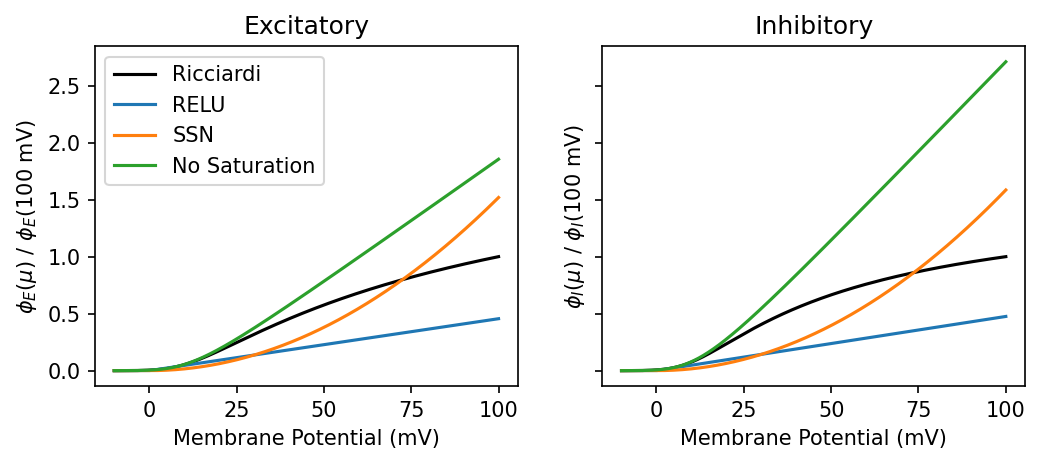

In [99]:
fig,axs = plt.subplots(1,2,figsize=(8,3),dpi=150,sharex=True,sharey=True)

mus = np.linspace(-0.01,0.1,1100+1)

axs[0].plot(1e3*mus,ri.phi_int_E(mus)/ri.phi_int_E(mus[-1]),'k',label='Ricciardi')
axs[0].plot(1e3*mus,E_scale*phi_relu(mus,a_relu)/ri.phi_int_E(mus[-1]),label='RELU')
axs[0].plot(1e3*mus,E_scale*phi_ssn(mus,a_ssn)/ri.phi_int_E(mus[-1]),label='SSN')
axs[0].plot(1e3*mus,ri_nosat.phi_int_E(mus)/ri.phi_int_E(mus[-1]),label='No Saturation')

axs[1].plot(1e3*mus,ri.phi_int_I(mus)/ri.phi_int_I(mus[-1]),'k',label='Ricciardi')
axs[1].plot(1e3*mus,phi_relu(mus,a_relu)/ri.phi_int_I(mus[-1]),label='RELU')
axs[1].plot(1e3*mus,phi_ssn(mus,a_ssn)/ri.phi_int_I(mus[-1]),label='SSN')
axs[1].plot(1e3*mus,ri_nosat.phi_int_I(mus)/ri.phi_int_I(mus[-1]),label='No Saturation')

axs[0].legend()

axs[0].set_xlabel('Membrane Potential (mV)')
axs[1].set_xlabel('Membrane Potential (mV)')

axs[0].set_ylabel(r'$\phi_E(\mu)\ /\ \phi_E($100 mV)')
axs[1].set_ylabel(r'$\phi_I(\mu)\ /\ \phi_I($100 mV)')

axs[0].set_title('Excitatory')
axs[1].set_title('Inhibitory')

Text(0, 0.5, '$\\phi_E(\\mu)\\ /\\ \\phi_I(\\mu)$')

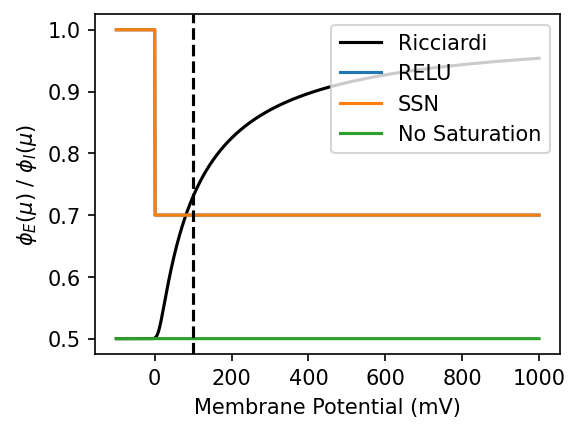

In [109]:
fig,axs = plt.subplots(1,1,figsize=(4,3),dpi=150,sharex=True,sharey=True)

mus = np.linspace(-0.1,1.0,1100+1)

axs.plot(1e3*mus,ri.phi_int_E(mus)/ri.phi_int_I(mus),'k',label='Ricciardi')
axs.plot(1e3*mus,E_scale*np.heaviside(mus*1e3,0) + (1-np.heaviside(mus*1e3,0)),label='RELU')
axs.plot(1e3*mus,E_scale*np.heaviside(mus*1e3,0) + (1-np.heaviside(mus*1e3,0)),label='SSN')
axs.plot(1e3*mus,ri_nosat.phi_int_E(mus)/ri_nosat.phi_int_I(mus),label='No Saturation')

axs.axvline(100,c='k',ls='--')

axs.legend(loc='upper right')

axs.set_xlabel('Membrane Potential (mV)')

axs.set_ylabel(r'$\phi_E(\mu)\ /\ \phi_I(\mu)$')